# EDA

In [12]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#warnings.filterwarnings("ignore")
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (25, 8)

In [30]:
df_total = pd.read_excel('../dataset/global_superstore_2016.xlsx', index_col=0)

In [34]:
df=df_total[df_total.Country =='United States'].copy()

In [35]:
to_datetime = ['Order Date', 'Ship Date']
for col in to_datetime:
    df[col] = pd.to_datetime(df[col])

In [36]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
Row ID,,,,,,,,,,,,,,,,,,,,,
40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
40099,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,FUR-BO-5957,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.960,2,0.0,54.7136,25.27,High
36258,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,Washington,...,FUR-CH-4421,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.712,1,0.2,5.4801,11.13,High
36259,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,Washington,...,OFF-AR-5309,Office Supplies,Art,Newell 330,17.940,3,0.0,4.6644,4.29,High
39519,CA-2012-AB10015140-40958,2012-02-19,2012-02-25,Standard Class,AB-100151402,Aaron Bergman,Consumer,76017.0,Arlington,Texas,...,OFF-ST-3078,Office Supplies,Storage,Akro Stacking Bins,12.624,2,0.2,-2.5248,1.97,Low


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 40098 to 31315
Data columns (total 23 columns):
Order ID          9994 non-null object
Order Date        9994 non-null datetime64[ns]
Ship Date         9994 non-null datetime64[ns]
Ship Mode         9994 non-null object
Customer ID       9994 non-null object
Customer Name     9994 non-null object
Segment           9994 non-null object
Postal Code       9994 non-null float64
City              9994 non-null object
State             9994 non-null object
Country           9994 non-null object
Region            9994 non-null object
Market            9994 non-null object
Product ID        9994 non-null object
Category          9994 non-null object
Sub-Category      9994 non-null object
Product Name      9994 non-null object
Sales             9994 non-null float64
Quantity          9994 non-null int64
Discount          9994 non-null float64
Profit            9994 non-null float64
Shipping Cost     9994 non-null float64
Order Prio

In [38]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896,24.015588
std,32063.693350,623.245101,2.225110,0.206452,234.260108,58.891473
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.010000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750,1.820000
50%,56430.500000,54.490000,3.000000,0.200000,8.666500,5.100000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000,19.985000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000,933.570000


## The number of orders by year

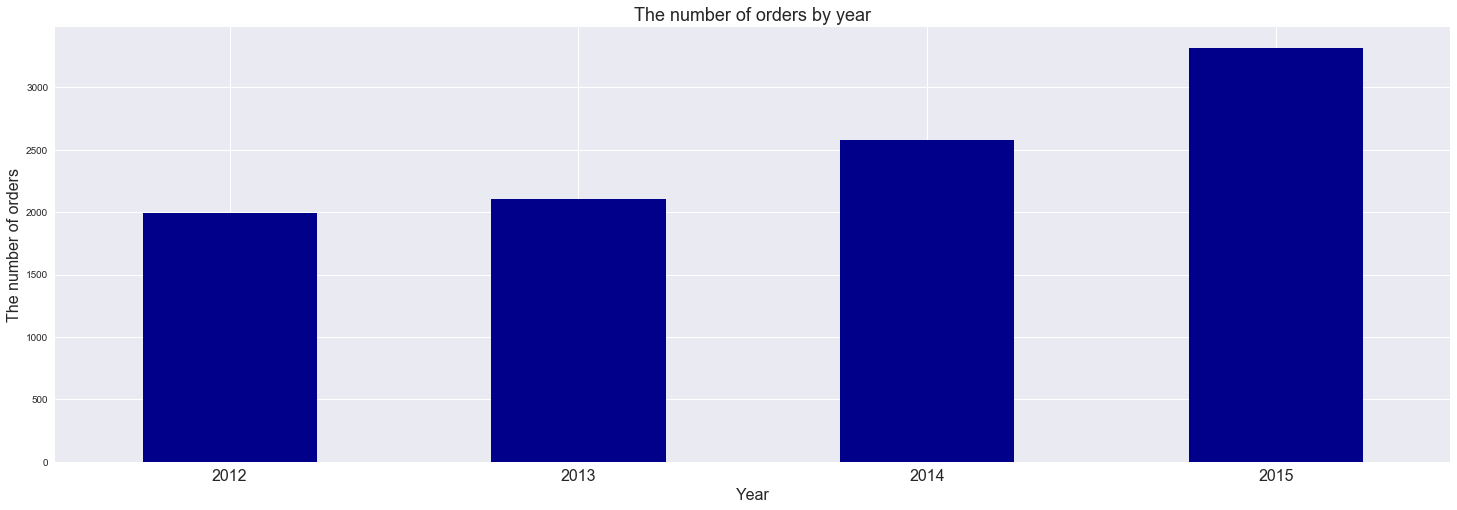

In [39]:
df['Order Date'].dt.year.value_counts(sort = False).plot.bar(color='darkblue')
plt.xticks(fontsize=16, rotation=360)
plt.xlabel('Year', fontsize=16)
plt.ylabel('The number of orders', fontsize=16);
plt.title('The number of orders by year', fontsize=18);

As we can see from the bar chart above, the number of orders is increasing every year.

## Historical sales and profit plot

In [40]:
for_sales_plotting = df[['Order Date', 'Sales']].set_index('Order Date')
for_profit_plotting = df[['Order Date', 'Profit']].set_index('Order Date')

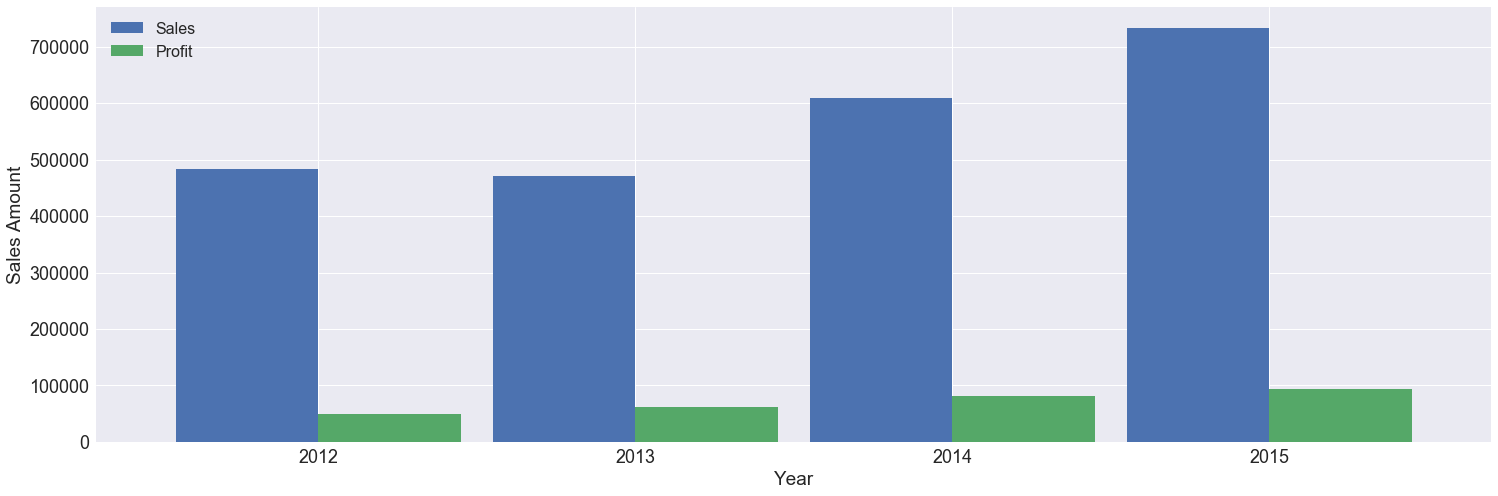

In [41]:
yearly_sales = for_sales_plotting.Sales.resample('A').sum()
sale_for_year = yearly_sales.groupby(yearly_sales.index.year).mean()
yearly_profit = for_profit_plotting.Profit.resample('A').sum()
profit_for_year = yearly_profit.groupby(yearly_profit.index.year).mean()

_ = pd.DataFrame(np.c_[sale_for_year, profit_for_year], index=np.arange(4))
_.plot.bar(width=0.9)
plt.xticks(np.arange(4), ('2012', '2013', '2014', '2015'), fontsize=18, rotation=0)
plt.yticks(fontsize=18)
plt.xlabel('Year', fontsize=19)
plt.ylabel('Sales Amount', fontsize=19)
gain = ['Sales', 'Profit']
plt.legend(gain, loc='upper left', fontsize=16);

## The number of orders by month

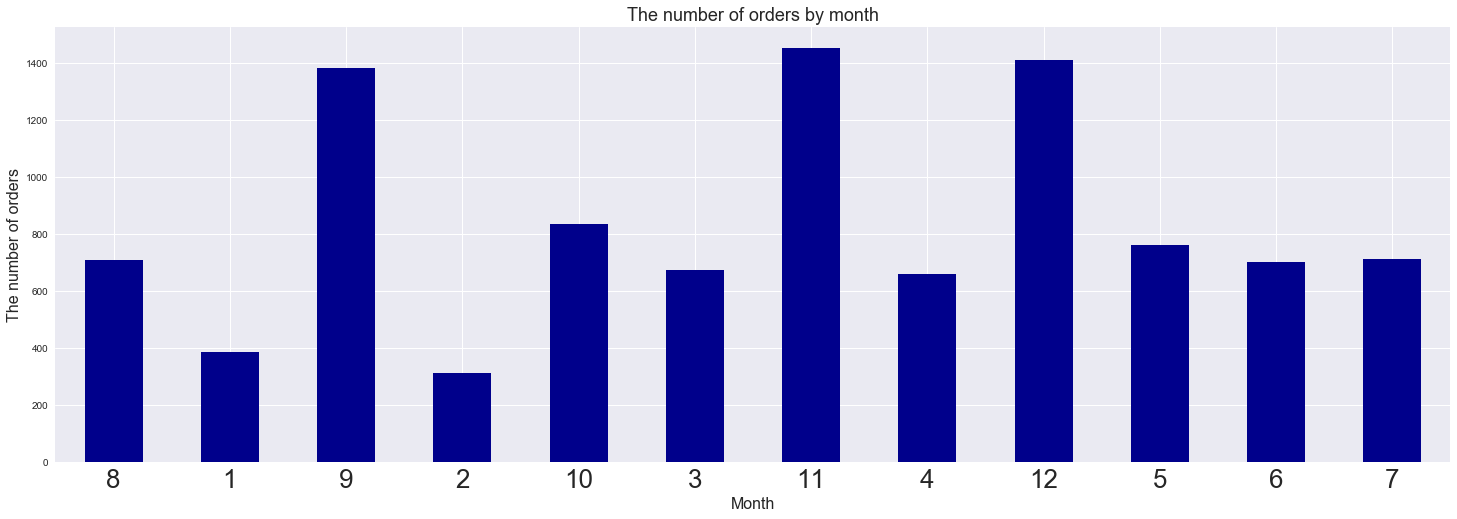

In [42]:
df['Order Date'].dt.month.value_counts(sort = False).plot.bar(color='darkblue')
plt.xticks(fontsize=26, rotation=360)
plt.xlabel('Month', fontsize=16)
plt.ylabel('The number of orders', fontsize=16);
plt.title('The number of orders by month', fontsize=18);

## Historical average sales and profit for every month

In [43]:
for_sales_plotting = df[['Order Date', 'Sales']].set_index('Order Date')
for_profit_plotting = df[['Order Date', 'Profit']].set_index('Order Date')

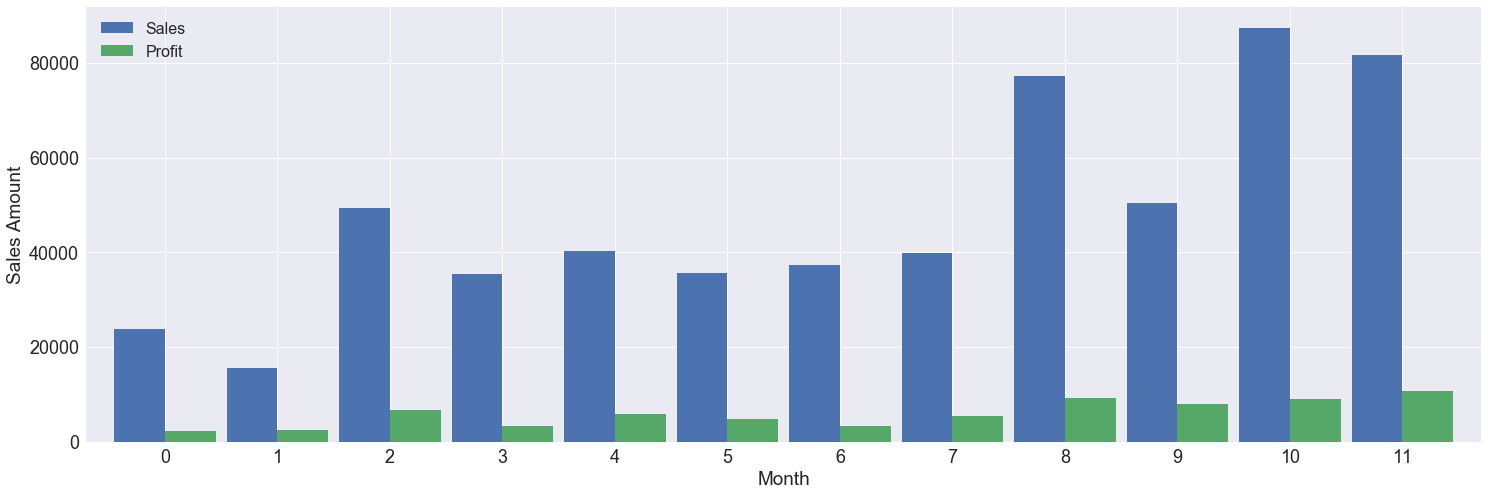

In [44]:
monthly_sales = for_sales_plotting.Sales.resample('M').sum()
sale_for_month = monthly_sales.groupby(monthly_sales.index.month).mean()

monthly_profit = for_profit_plotting.Profit.resample('M').sum()
profit_for_month = monthly_profit.groupby(monthly_profit.index.month).mean()

_ = pd.DataFrame(np.c_[sale_for_month, profit_for_month], index=np.arange(12))
_.plot.bar(width=0.9)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18)
plt.xlabel('Month', fontsize=19)
plt.ylabel('Sales Amount', fontsize=19)
gain = ['Sales', 'Profit']
plt.legend(gain, loc='upper left', fontsize=16);

## Historical average sales by day of week

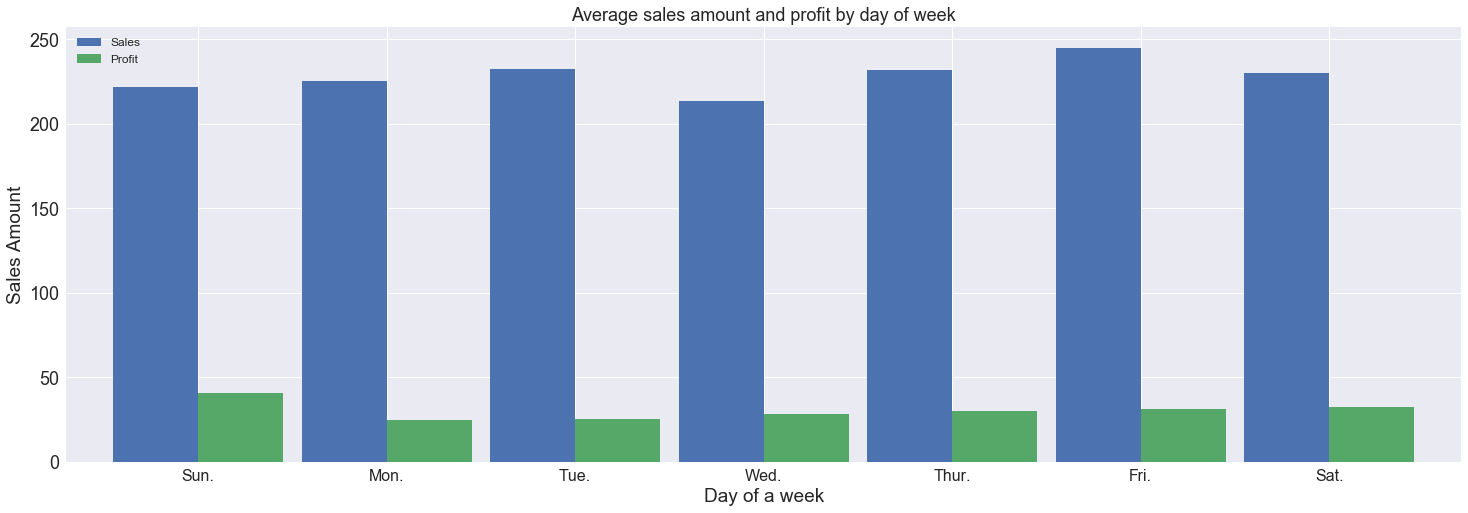

In [45]:
sale_for_week = for_sales_plotting.groupby(for_sales_plotting.index.dayofweek).mean()
profit_for_week = for_profit_plotting.groupby(for_profit_plotting.index.dayofweek).mean()

_ = pd.DataFrame(np.c_[sale_for_week, profit_for_week], index=np.arange(7))
_.plot.bar(width=0.9)
plt.xticks(np.arange(7), ('Sun.', 'Mon.', 'Tue.', 'Wed.', 'Thur.', 'Fri.', 'Sat.'), fontsize=16, rotation=0)
plt.yticks(fontsize=18)
plt.xlabel('Day of a week', fontsize=19)
plt.ylabel('Sales Amount', fontsize=19)
gain = ['Sales', 'Profit']
plt.legend(gain, loc='upper left', fontsize=12)
plt.title('Average sales amount and profit by day of week', fontsize=18);

## Sales by category

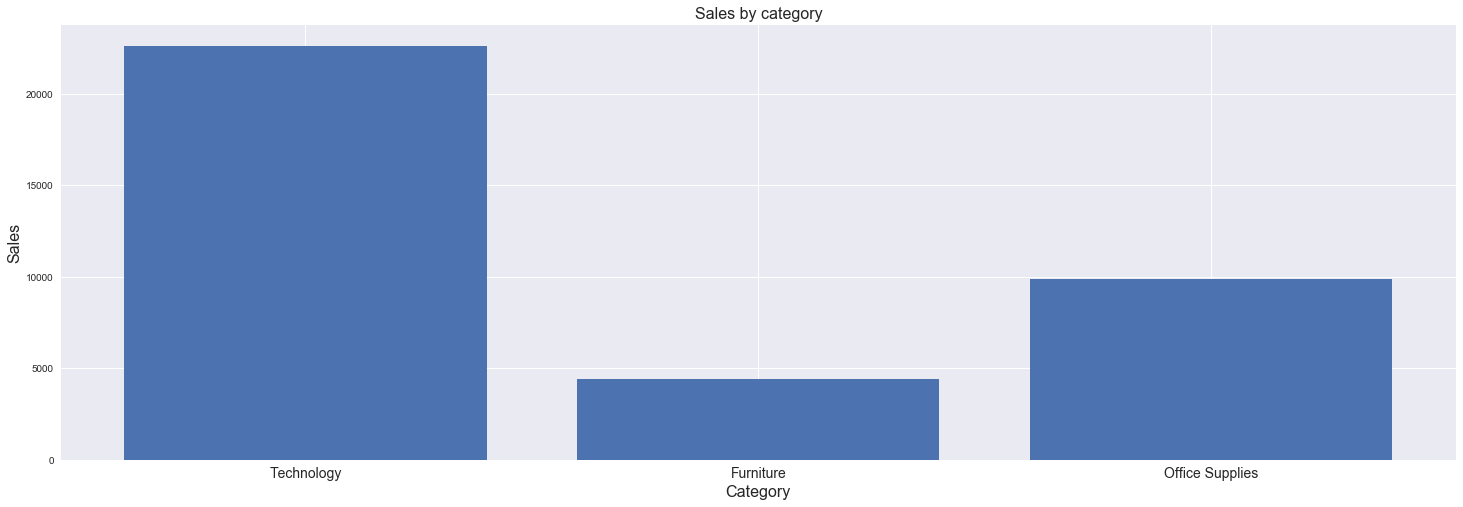

In [46]:
plt.bar(df.Category, df.Sales, align='center')
plt.xticks(fontsize=14)
plt.xlabel('Category', fontsize=16)
plt.ylabel('Sales', fontsize=16);
plt.title('Sales by category', fontsize=16);

## Sales by Sub-category

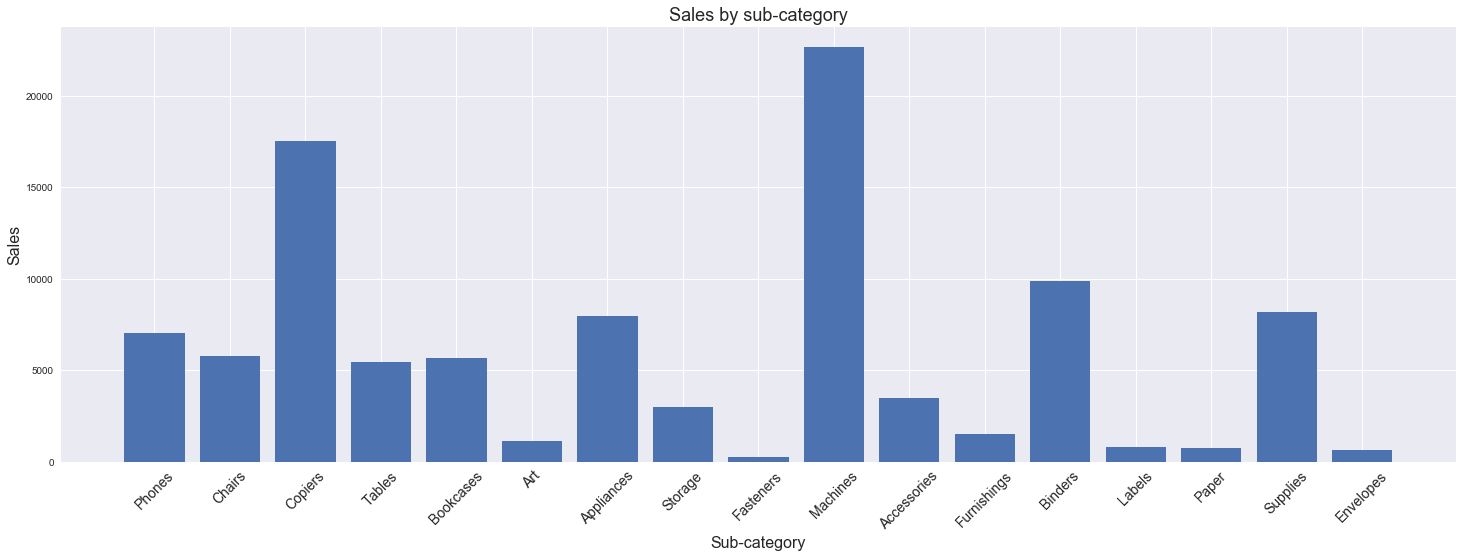

In [24]:
plt.bar(df['Sub-Category'], df['Sales'], align='center')
plt.xticks(fontsize=14, rotation=45)
plt.xlabel('Sub-category', fontsize=16)
plt.ylabel('Sales', fontsize=16);
plt.title('Sales by sub-category', fontsize=18);

## Sales by market

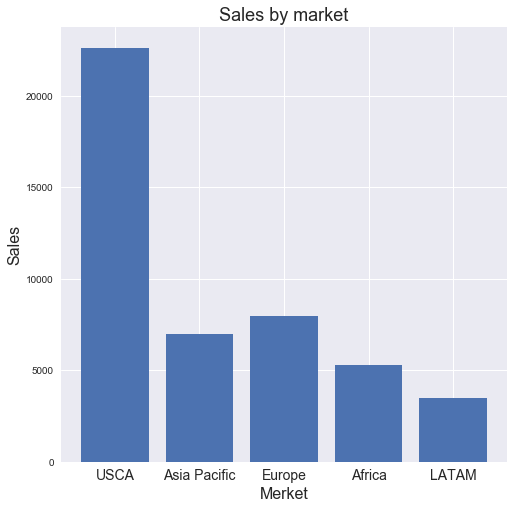

In [57]:
plt.bar(df_total['Market'], df_total['Sales'], align='center')
plt.xticks(fontsize=14)
plt.xlabel('Merket', fontsize=16)
plt.ylabel('Sales', fontsize=16);
plt.title('Sales by market', fontsize=18);

## Sales by segment

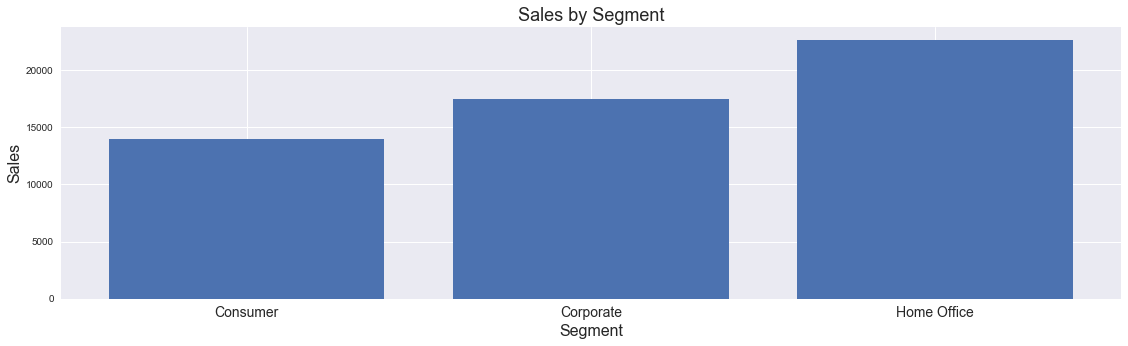

In [63]:
plt.bar(df['Segment'], df['Sales'], align='center')
plt.xticks(fontsize=14)
plt.xlabel('Segment', fontsize=16)
plt.ylabel('Sales', fontsize=16);
plt.title('Sales by Segment', fontsize=18);

## Check how many promotion was used

In [51]:
(df.Discount > 0.0).value_counts()

True     5196
False    4798
Name: Discount, dtype: int64

In [53]:
5196 / len(df) * 100

51.9911947168301

 About 52% of prodcuts are purchased on discount.

## Check the outliners

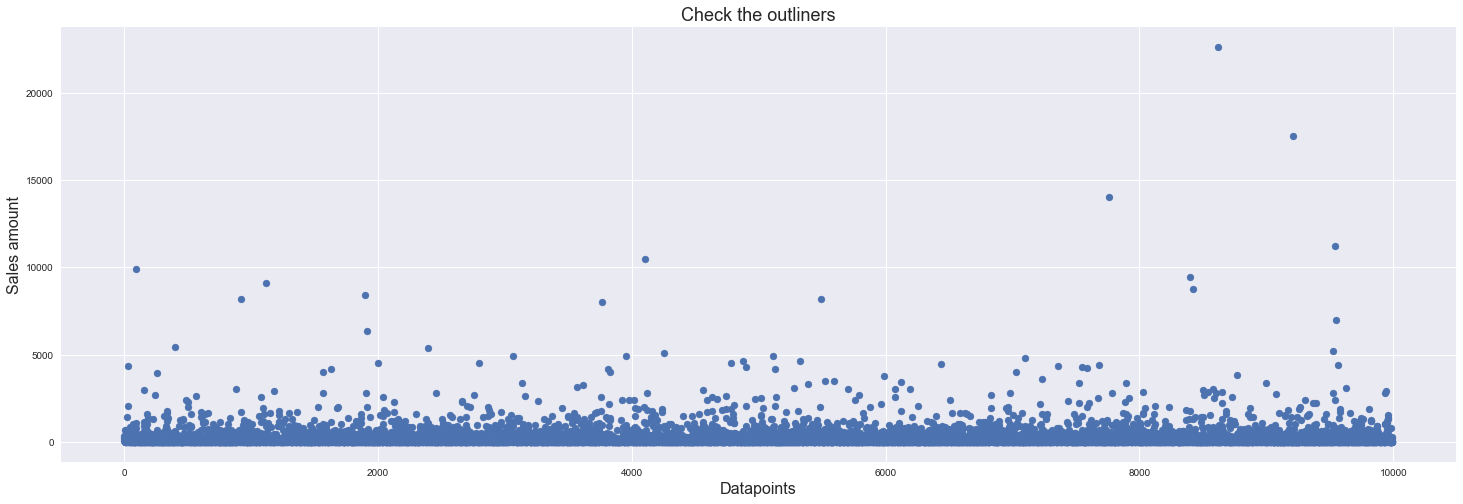

In [54]:
plt.scatter(range(df.Sales.shape[0]), df.Sales.values)
plt.xlabel('Datapoints', fontsize=16)
plt.ylabel('Sales amount', fontsize=16);
plt.title('Check the outliners', fontsize=18);

There are few outliners which have significant high sales amount. The outliners wil be take into consideration when other analyses are performed.

## Check the repeated customers

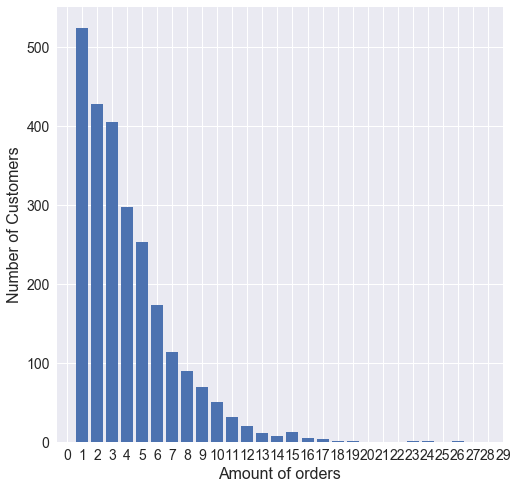

In [56]:
plt.rcParams['figure.figsize'] = (8, 8)
num_order_per_customer = df.groupby('Customer ID')['Order ID'].count().value_counts()

plt.bar(num_order_per_customer.index, num_order_per_customer)
plt.xticks(np.arange(30), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Amount of orders', fontsize=16)
plt.ylabel('Number of Customers', fontsize=16)
plt.title('', fontsize=18);

Looks like most of the customers only made 1 or 2 orders from us